# Machine Learning LAB 1 
Course 2023/24: F. Chiariotti

The notebook contains some simple tasks to be performed about **classification and regression**. <br>
Complete all the **required code sections** and **answer to all the questions**. <br>

### IMPORTANT for the evaluation score:
1. **Read carefully all cells** and **follow the instructions**
1. **Rerun all the code from the beginning** to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebooks.
2. Make sure to fill the code in the appropriate places **without modifying the template**, otherwise you risk breaking later cells.
3. Please **submit the jupyter notebook file (.ipynb)**, do not submit python scripts (.py) or plain text files. **Make sure that it runs fine with the restat&run all command** - otherwise points will be deduced.
4. **Answer the questions in the appropriate cells**, not in the ones where the question is presented.

## A) Classification of Stayed/Churned Customers

Place your **name** and **ID number** (matricola) in the cell below. <br>
Also recall to **save the file as Surname_Name_LAB1.ipynb** otherwise your homework could get lost
<br>

**Student name**: Mario Rossi<br>
**ID Number**: 1234

### Dataset description

The Customer Churn table contains information on all 3,758 customers from a Telecommunications company in California in Q2 2022. 
The dataset contains three features:
- **Tenure in Months**: Number of months the customer has stayed with the company
- **Monthly Charge**: The amount charged to the customer monthly
- **Age**: Customer's age

The aim of the task is to predict if a customer will churn or not based on the three features.

<center>

![COVER](data/dataset-cover.png "COVER")

</center>

We first **import** all **the packages** that are needed.

In [1]:
#importing some library
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model, preprocessing
import math 

Change some global settings for layout purposes.

In [2]:
# if you are in the jupyter notebook environment you can change the 'inline' option with 'notebook' to get interactive plots
%matplotlib inline
# change the limit on the line length and crop to 0 very small numbers, for clearer printing
np.set_printoptions(linewidth=500, suppress=True)

## A.1) Perceptron
In the following cells we will **implement** the **perceptron** algorithm and use it to learn a halfspace.

**TO DO (A.1.0):** **Set** the random **seed** using your **ID**. If you need to change it for testing add a constant explicitly, eg.: 1234567 + 1

In [24]:
name= 'Giacomo Longaroni'
IDnumber = 293948# YOUR_ID
np.random.seed(IDnumber)

Before proceding to the training steps, we **load the dataset and split it** in training and test set (the **training** set is **typically larger**, here we use a 75% training 25% test split).
The **split** is **performed after applying a random permutation** to the dataset, such permutation will **depend on the seed** you set above. Try different seeds to evaluate the impact of randomization.<br><br>
**DO NOT CHANGE THE PRE-WRITTEN CODE UNLESS OTHERWISE SPECIFIED**

### The Dataset
The dataset is a `.csv` file containing three input features and a label. Here is an example of the first 4 rows of the dataset: 

<center>

Tenure in Months | Monthly Charge | Age | Customer Status |
| -----------------| ---------------|-----|-----------------|
| 9 | 65.6 | 37 | 0 |
| 9 | -4.0 | 46 | 0 |
| 4 | 73.9 | 50 | 1 |
| ... | ... | ... | ... |

</center>

Customer Status is 0 if the customer has stayed with the company and 1 if the customer has churned.

In [25]:
#load the dataset 
def load_dataset(filename):
    data_train = pd.read_csv(filename)
    
    #permute the data
    data_train = data_train.sample(frac=1).reset_index(drop=True) # shuffle the data
    X = data_train.iloc[:, 0:3].values # Get first two columns as the input
    Y = data_train.iloc[:, 3].values # Get the third column as the label
    Y = 2*Y-1 # Make sure labels are -1 or 1 (0 --> -1, 1 --> 1)
    return X,Y

In [26]:
# Load the dataset
X, Y = load_dataset('data/telecom_customer_churn_cleaned.csv')

We are going to differentiate (classify) between **class "1" (churned)** and **class "-1" (stayed)**

# Split data in training and test sets



Given $m$ total data, denote with $m_{t}$ the part used for training. Keep $m_t$ data as training data, and $m_{test}:= m-m_{t}$. <br>
For instance one can take $m_t=0.75m$ of the data as training and $m_{test}=0.25m$ as testing. <br>
Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

TESTING DATA: The test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$

**TO DO (A.1.1):** **Divide** the **data into training and test set** (**75%** of the data in the **first** set, **25%** in the **second** one). <br>
<br>
Notice that as is common practice in Statistics and Machine Learning, **we scale the data** (= each variable) so that it is centered **(zero mean)** and has **standard deviation equal to 1**. <br>
This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [27]:
#FIRST METOD USING NUMPY
################################################

m = X.shape[0] #no raws (data)

m_training = math.ceil(m * 0.75)  #define number of training samples


X_training = X[:m_training, :]  #creating matrix of test and training from original data  
X_test = X[m_training:, :]
Y_training = Y[:m_training] 
Y_test = Y[m_training:]
   
print("Number of samples in the train set:", X_training.shape[0])    #check if everthing is ok
print("Number of samples in the test set:", X_test.shape[0])
print("\nNumber of night instances in test:", np.sum(Y_test==-1))
print("Number of day instances in test:", np.sum(Y_test==1))

# standardize the input matrix
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
X_training =  scaler.transform(X_training)
print ("Mean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))

X_test =  scaler.transform(X_test)
print ("Mean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))

Number of samples in the train set: 2818
Number of samples in the test set: 939

Number of night instances in test: 464
Number of day instances in test: 475
Mean of the training input data: [ 0. -0. -0.]
Std of the training input data: [1. 1. 1.]
Mean of the test input data: [-0.00028956 -0.07079323  0.01112624]
Std of the test input data: [1.00269944 1.02977766 1.01301934]


We **add a 1 in front of each sample** so that we can use a vector in **homogeneous coordinates** to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [28]:
def to_homogeneous(X_training, X_test):
    # Add a 1 to each sample (homogeneous coordinates)
    X_training = np.hstack( [np.ones( (X_training.shape[0], 1) ), X_training] )
    X_test = np.hstack( [np.ones( (X_test.shape[0], 1) ), X_test] )
    
    return X_training, X_test

In [29]:
# convert to homogeneous coordinates using the function above
X_training, X_test = to_homogeneous(X_training, X_test)
print("Training set in homogeneous coordinates:")
print(X_training[:10])

Training set in homogeneous coordinates:
[[ 1.          0.10546618  0.52886723  0.5013868 ]
 [ 1.         -0.27052949 -1.60323257 -0.55811762]
 [ 1.         -0.1451976  -0.21602253 -1.44103798]
 [ 1.         -1.14785272  0.39603136 -0.20494948]
 [ 1.         -0.93896623  0.71887297 -0.73470169]
 [ 1.         -0.68830246  0.07318975  1.7374753 ]
 [ 1.         -0.35408408  0.43470509  0.44252545]
 [ 1.          1.44233966  1.45199246 -0.38153355]
 [ 1.         -0.89718894 -1.62004724 -1.61762205]
 [ 1.          1.44233966  0.80126484 -1.55876069]]


**TO DO (A.1.2):** Now **complete** the function *perceptron*. <br>
The **perceptron** algorithm **does not terminate** if the **data** is not **linearly separable**, therefore your implementation should **terminate** if it **reached the termination** condition seen in class **or** if a **maximum number of iterations** have already been run, where one **iteration** corresponds to **one update of the perceptron weights**. In case the **termination** is reached **because** the **maximum** number of **iterations** have been completed, the implementation should **return the best model** seen throughout .

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model (or the latest, if the termination condition is reached)
- $best\_error$: the *fraction* of misclassified samples for the best model

In [30]:
#we create a function that can give us the number of misclassified samples and their index
def count_errors(current_w, X, Y):
    
    #create an array containing the prediction (w^t X Y) and boolean duplicate 
    predictions_sign = np.dot(X,current_w)*Y
    #creating a boolean vector 
    predictions_bool = np.where(predictions_sign>0,0,1)
     
    # compute misclassified sum
    num_misclassified = np.sum(predictions_bool)
    
    #creating an array to store missclassified indices
    index_misclassified = np.where(predictions_bool == 1)[0]
    
    if np.all(index_misclassified == 0):
        return 0, -1
    
    return num_misclassified, index_misclassified

In [63]:
#let's define perceptron update, i add a new term for the function 's' (the index of sample)
#to update the perceptron add for some error occurring in the later functions

def perceptron_update(current_w, X, Y, s):
    eta = 0.001   #step
    new_w = current_w + eta *( Y[s] * X[s])  # updating weight w with the misclass. sample s
    return new_w

In [64]:
def perceptron_no_randomization(X, Y, max_num_iterations):
    
    # Initialize some support variables 
    num_samples = X.shape[0]
    best_error = num_samples+1
    
    # Initialize the weights of the algorith with w=0 using numpy
    curr_w = np.ones(4)
    # The best_w variable will be used to keep track of the best solution
    best_w = curr_w.copy()

    # compute the number of misclassified samples and the index of the first of them
    num_misclassified, index_misclassified = count_errors(curr_w, X, Y)
    
    # update the 'best' variables
    if num_misclassified < best_error:
        best_error = num_misclassified 
        best_w = curr_w
    
    # initialize the number of iterations
    num_iter = 0
    #here we store the evolution of error and w for future plot
    history_err = []
    history_w = []
    
    # Main loop 
    #i change the second condition with 'and num_misclassified > 0:' due to an error during debugging
    while num_iter < max_num_iterations and num_misclassified > 0:
        num_misclassified, index_misclassified = count_errors(curr_w, X, Y)

        if num_misclassified > 0:
            # selecting the new [0] sample from index_missclassified
            s = index_misclassified[0] 
            #updating w
            curr_w = perceptron_update(curr_w, X, Y,s)
        
        #storing the variables
        if num_misclassified < best_error:
            best_error = num_misclassified
            best_w = curr_w.copy()

        history_err.append(num_misclassified)
        history_w.append(curr_w.copy())

        num_iter += 1

        
        
    best_error = num_misclassified
    
    #the function give the best w and the error on the sample, 
    #in order to plot the error i add two new array giving the history of the error and w
    return best_w, best_error, history_err, history_w

Now we use the implementation above of the perceptron to learn a model from the training data using 30 iterations and print the error of the best model we have found.

In [65]:
# Now run the perceptron for 30 iterations
w_found, error, err_plt, w_plt = perceptron_no_randomization(X_training,Y_training, 30)
print("Training Error of perceptron (30 iterations): " + str(error))
print("n of sample: " + str(Y_training.shape[0]))


Training Error of perceptron (30 iterations): 1481
n of sample: 2818


**TO DO (A.1.3):** use the best model $w\_found$ to **predict the labels for the test dataset** and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [66]:
#storing errors
errors, _ = count_errors(w_found, X_test,Y_test)

#we estimet true loss as experimental loss on the test set
#(num_err/num_sampl) = % of error of the model 
true_loss_estimate = errors/(X_test.shape[0])

print("Test Error of perceptron (30 iterations): " + str(true_loss_estimate))

Test Error of perceptron (30 iterations): 0.5175718849840255


**TO DO (A.1.4):** implement the correct randomized version of the perceptron such that at each iteration the algorithm picks a random misclassified sample and updates the weights using that sample.

In [67]:
def perceptron(X, Y, max_num_iterations):
    
    
    num_samples = X.shape[0]
    best_error = num_samples+1
    
    
    curr_w = np.ones(4)   
    best_w = curr_w.copy()
    
    num_misclassified, index_misclassified = count_errors(curr_w, X, Y)
    
    
    if num_misclassified < best_error:
        best_error = num_misclassified 
        best_w = curr_w
    
    num_iter = 0
    history_err = []
    history_w = []
    
    
    while num_iter < max_num_iterations and num_misclassified > 0:
        num_misclassified, index_misclassified = count_errors(curr_w, X, Y)

        if num_misclassified > 0:
            #we extract a random variable of the array 
            s = np.random.choice(index_misclassified)  
            curr_w = perceptron_update(curr_w, X, Y,s)
        
        if num_misclassified < best_error:
            best_error = num_misclassified
            best_w = curr_w.copy()

        history_err.append(num_misclassified)
        history_w.append(curr_w.copy())

        num_iter += 1

        
        
    best_error = num_misclassified
    
    return best_w, best_error, history_err, history_w

**TO DO (A.1.5):** Now test the correct version of the perceptron using 30 iterations and print the error of the best model we have found.

In [68]:
# Now run the perceptron for 30 iterations
best_w, best_error, history_err, history_w = perceptron(X_training,Y_training, 30)
print("Training Error of perceptron (30 iterations): " + str(error))

errors, _ = count_errors(best_w, X_test,Y_test)

true_loss_estimate = errors/X_test.shape[0]
print("Test Error of perceptron (30 iterations): " + str(true_loss_estimate))

Training Error of perceptron (30 iterations): 1481
Test Error of perceptron (30 iterations): 0.5143769968051118


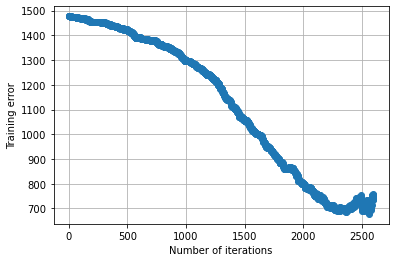

In [78]:
#to plot the error evolution i decided to use the putput of the function perceptorn 

num_iters = 2600
w_found, error, err_plt, w_plt = perceptron(X_training, Y_training, num_iters)
   
plt.plot(err_plt, marker= 'o')
plt.xlabel('Number of iterations')
plt.ylabel('Training error')
plt.grid()
plt.show()


#inizializing the vector w as [0,0,0,0] the error evolution seems like popcorn function
#in order to aprieciete better the evolution of the error is nice to inizialize as w =[1,1,1,1]

**TO DO (A.1.6):** Copy the code from the last 2 cells above in the cell below and repeat the training with 3000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

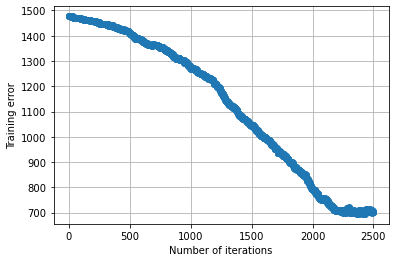

Training Error of perceptron (3000 iterations): 0.24875798438608943
Test Error of perceptron (3000 iterations): 0.5143769968051118


In [84]:
num_iters = 2500
w_found, error, err_plt, w_plt = perceptron(X_training, Y_training, num_iters)
   
plt.plot(err_plt, marker= 'o')
plt.xlabel('Number of iterations')
plt.ylabel('Training error')
plt.grid()
plt.show()
print("Training Error of perceptron (3000 iterations): " + str(error/X_training.shape[0]))

num_errors, _ =  count_errors(best_w, X_test,Y_test)

true_loss_estimate = num_errors/X_test.shape[0]
print("Test Error of perceptron (3000 iterations): " + str(true_loss_estimate))


#very strange that test error is lower than training good for the model... but not for me, i don't understand 
#maybe for the low number of the sample in the set 

# A.2) Logistic Regression
Now we use **logistic regression**, exploiting the implementation in **Scikit-learn**, to predict labels. We will also plot the decision boundaries of logistic regression.

We first load the dataset again.

To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. <br>
See the Scikit-learn documentation for how to use it [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

**TO DO (A.2.2):** **Define** the **logistic regression** model, then **learn** the model using **the training set** and **predict** on the **test set**. Then **print** the **fraction of samples misclassified** in the training set and in the test set.

In [56]:
#importing logreg
from sklearn.linear_model import LogisticRegression


#making the fit with logreg 
logreg = LogisticRegression(C=1e5).fit(X_training, Y_training)

#print the optimal coefficient 
print("Intercept:" , logreg.intercept_)
print("Coefficients:" , logreg.coef_)

# predict on training set (aplling the optimal paramter on the data samples)
predicted_training = logreg.predict(X_training)

# print the error rate = fraction of misclassified samples
error_count_training = (predicted_training != Y_training).sum()
error_rate_training = error_count_training/X_training.shape[0]
print("Error rate on training set: "+str(error_rate_training))

# predict on test set
predicted_test = logreg.predict(X_test)

#print the error rate = fraction of misclassified samples
error_count_test = (predicted_test != Y_test).sum()
error_rate_test = error_count_test/X_test.shape[0]
print("Error rate on test set: " + str(error_rate_test))

Intercept: [-0.06447489]
Coefficients: [[-0.06447488 -1.46630875  0.83999769  0.22359391]]
Error rate on training set: 0.24698367636621718
Error rate on test set: 0.23855165069222578


**TO DO (A.2.3)** Now **pick two features** and restrict the dataset to include only two features, whose indices are specified in the $idx0$ and $idx1$ variables below. Then split into training and test.

In [57]:
feature_names  = ["Tenure in Months","Monthly Charge","Age"]

# Select the two features to use
idx0 = 0
idx1 = 1

X_reduced = X[:,[idx0,idx1]]

# re-initialize the dataset splits, with the reduced sets
X_training = X_reduced[:m_training, :]  #creating matrix of test and training from original data  
X_test = X_reduced[m_training:, :]
Y_training = Y[:m_training] 
Y_test = Y[m_training:]

X_reduced

array([[ 64.  ,  84.3 ],
       [ 23.  , 106.4 ],
       [ 18.  ,  90.1 ],
       ...,
       [ 71.  ,  24.75],
       [ 30.  ,  97.  ],
       [  2.  ,  94.2 ]])

Now learn a model using the training data and measure the performances.

In [58]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5).fit(X_training, Y_training)

predicted_test = logreg.predict(X_test)

#print the error rate = fraction of misclassified samples
error_count_test = (predicted_test != Y_test).sum()

# print the error rate = fraction of misclassified samples
error_rate_test = error_count_test/X_test.shape[0]
print("Error rate on test set: " + str(error_rate_test))

Error rate on test set: 0.24600638977635783
